In [28]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("engin_test.csv")

# DATASET BASE

### Ventes sur deux ans par pays (top 10)


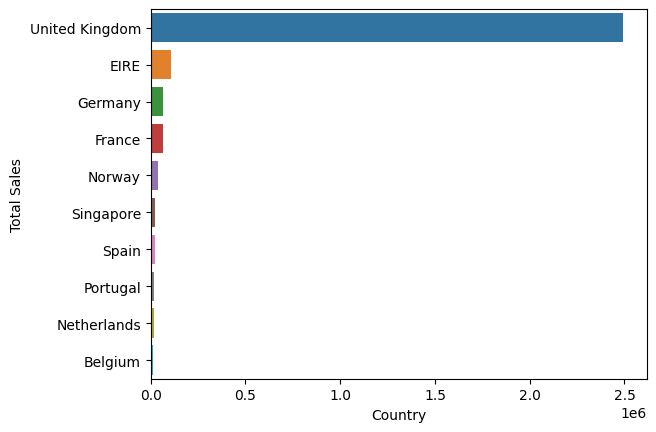

In [14]:
# Grouper les données par pays et calculer le montant total des ventes par pays
sales_by_country = df.groupby('Country')['Price'].sum().reset_index()

# Trier les pays par montant de ventes décroissant
sorted_sales = sales_by_country.sort_values(by='Price', ascending=False)

# Sélectionner les top 5 pays avec les plus hautes ventes
top_5_countries = sorted_sales.head(10)

# Afficher un diagramme à barres des ventes par pays (top 5)
sns.barplot(data=top_5_countries, x='Price', y='Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()



### Quantités sur deux ans par pays (top 10)

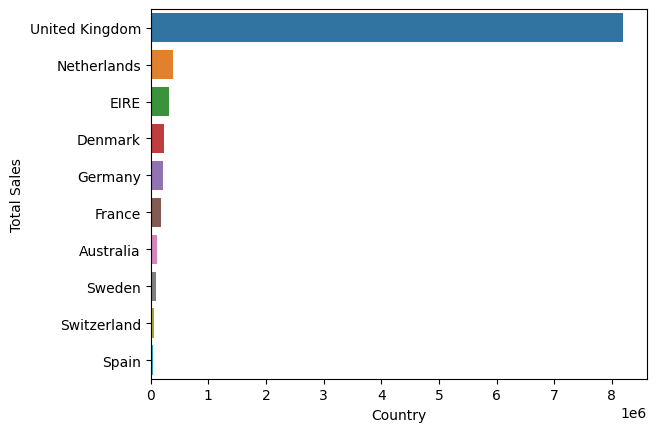

In [15]:
# Grouper les données par pays et calculer le montant total des ventes par pays
sales_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

# Trier les pays par montant de ventes décroissant
sorted_sales = sales_by_country.sort_values(by='Quantity', ascending=False)

# Sélectionner les top 5 pays avec les plus hautes ventes
top_5_countries = sorted_sales.head(10)

# Afficher un diagramme à barres des ventes par pays (top 5)
sns.barplot(data=top_5_countries, x='Quantity', y='Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


### Top 10 des produits vendus en UK


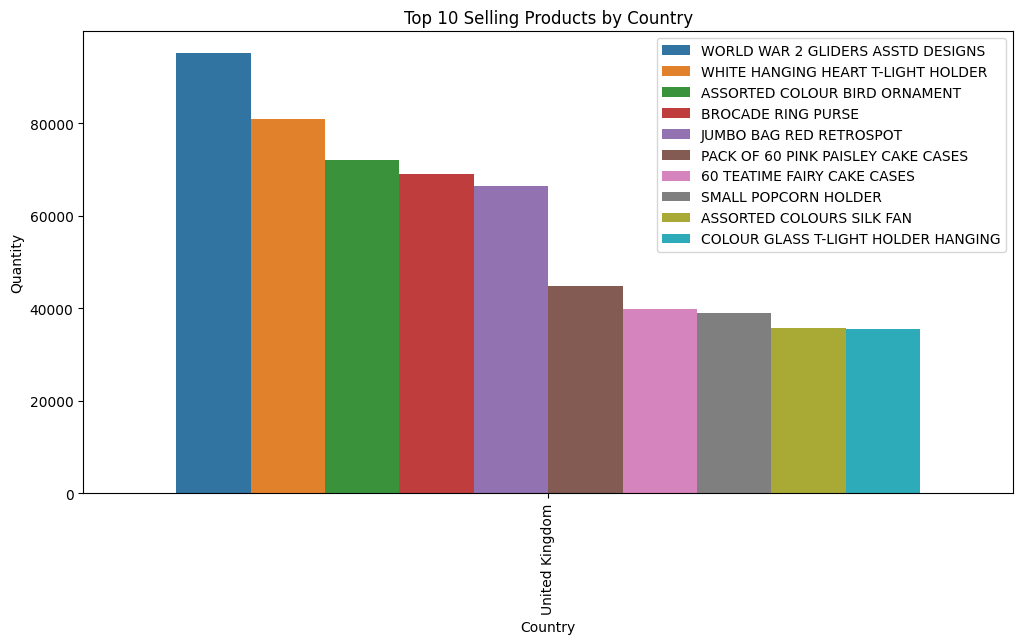

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper les données par pays et description de produit, puis calculer la somme des quantités vendues pour chaque combinaison pays-produit
top_products_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Trier les données par quantité vendue décroissante
top_products_by_country = top_products_by_country.sort_values('Quantity', ascending=False)

# Sélectionner les 10 premiers produits (les plus vendus)
top_10_products = top_products_by_country.head(10)

# Afficher le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='Country', y='Quantity', hue='Description')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Selling Products by Country')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


### Top ventes 2009-2010 et 2010-2011


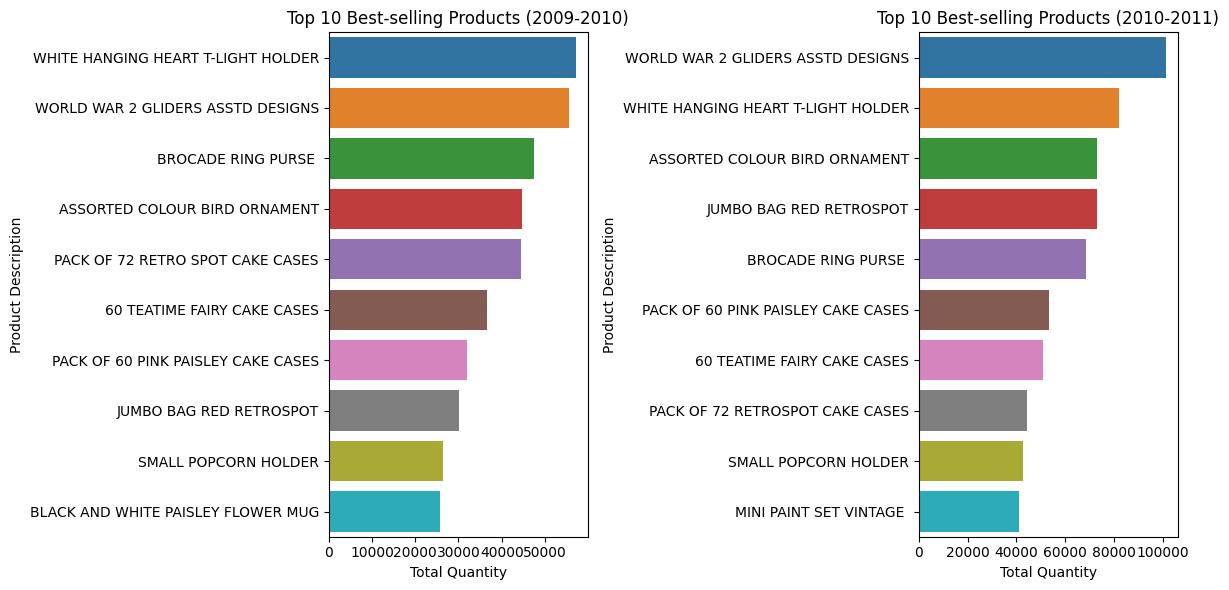

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour la période 2009-2010
period_1 = df[(df['InvoiceDate'].dt.year >= 2009) & (df['InvoiceDate'].dt.year <= 2010)]
top_products_period_1 = period_1.groupby('Description')['Quantity'].sum().reset_index()
top_products_period_1 = top_products_period_1.sort_values(by='Quantity', ascending=False).head(10)

# Filtrer les données pour la période 2010-2011
period_2 = df[(df['InvoiceDate'].dt.year >= 2010) & (df['InvoiceDate'].dt.year <= 2011)]
top_products_period_2 = period_2.groupby('Description')['Quantity'].sum().reset_index()
top_products_period_2 = top_products_period_2.sort_values(by='Quantity', ascending=False).head(10)

# Créer une figure avec deux sous-plots pour afficher les deux périodes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Premier sous-plot : période 2009-2010
sns.barplot(data=top_products_period_1, x='Quantity', y='Description', ax=axes[0])
axes[0].set_xlabel('Total Quantity')
axes[0].set_ylabel('Product Description')
axes[0].set_title('Top 10 Best-selling Products (2009-2010)')

# Deuxième sous-plot : période 2010-2011
sns.barplot(data=top_products_period_2, x='Quantity', y='Description', ax=axes[1])
axes[1].set_xlabel('Total Quantity')
axes[1].set_ylabel('Product Description')
axes[1].set_title('Top 10 Best-selling Products (2010-2011)')

# Ajuster les espacements entre les sous-plots
plt.tight_layout()

# Afficher le graphique
plt.show()


### Revenus en 2009 et 2010


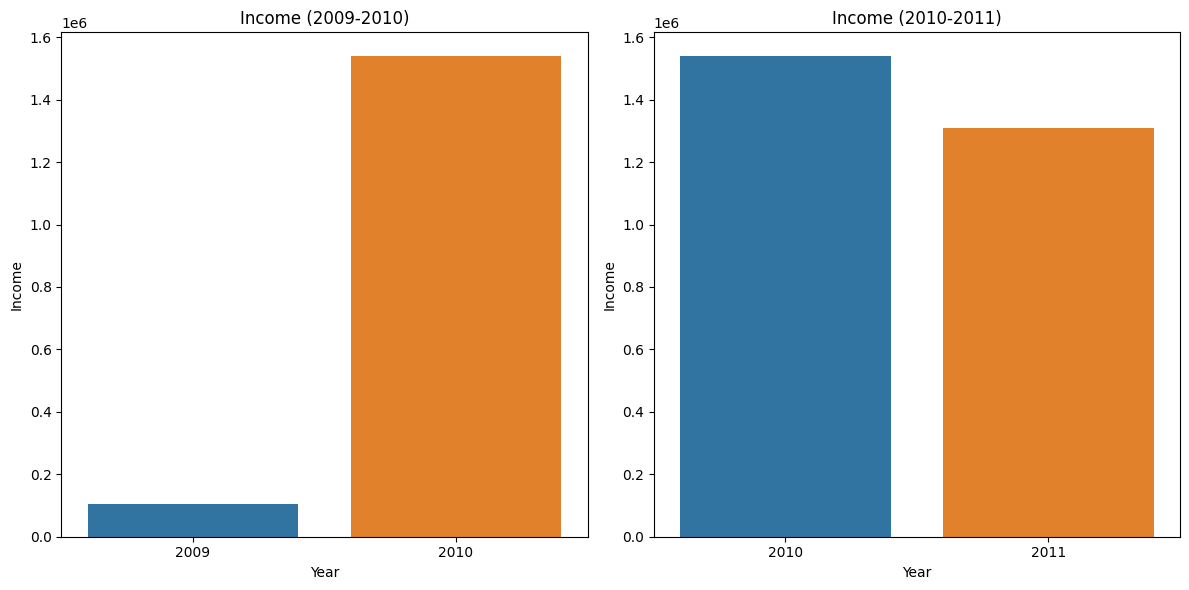

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour la période 2009-2010
period_1 = df[(df['InvoiceDate'].dt.year >= 2009) & (df['InvoiceDate'].dt.year <= 2010)]
income_2009_2010 = period_1.groupby(period_1['InvoiceDate'].dt.to_period('Y'))['Price'].sum().reset_index()

# Filtrer les données pour la période 2010-2011
period_2 = df[(df['InvoiceDate'].dt.year >= 2010) & (df['InvoiceDate'].dt.year <= 2011)]
income_2010_2011 = period_2.groupby(period_2['InvoiceDate'].dt.to_period('Y'))['Price'].sum().reset_index()

# Créer une figure avec deux sous-plots pour afficher les deux périodes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Premier sous-plot : période 2009-2010
sns.barplot(data=income_2009_2010, x='InvoiceDate', y='Price', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Income')
axes[0].set_title('Income (2009-2010)')

# Deuxième sous-plot : période 2010-2011
sns.barplot(data=income_2010_2011, x='InvoiceDate', y='Price', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Income')
axes[1].set_title('Income (2010-2011)')

# Ajuster les espacements entre les sous-plots
plt.tight_layout()

# Afficher le graphique
plt.show()


### Nombre de clients par mois sur deux ans


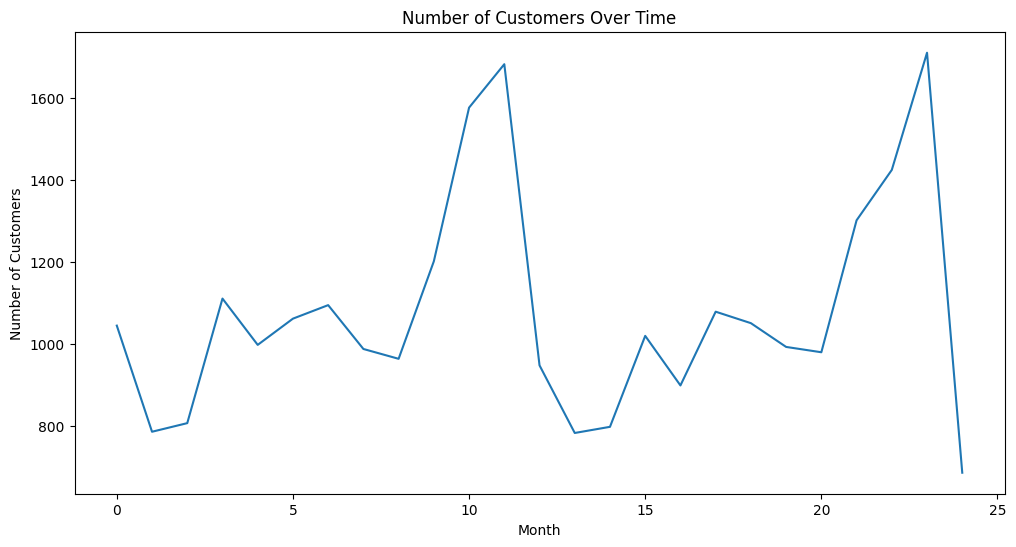

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la colonne 'InvoiceDate' en type datetimelike
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Grouper les données par mois et compter le nombre de clients uniques
monthly_customers = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Customer ID'].nunique().reset_index()

# Créer le graphique à ligne
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x=monthly_customers.index, y='Customer ID')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Over Time')

# Afficher le graphique
plt.show()




### Nombre d'annulations par pays (sur deux ans)


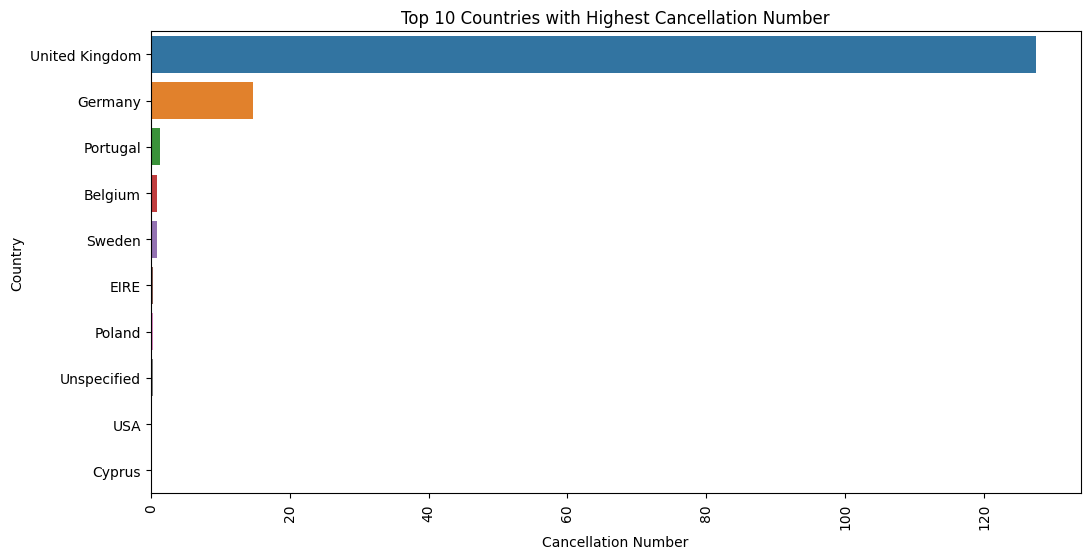

In [20]:
# Filtrer les données pour les factures d'annulation
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

# Calculer le nombre d'annulations par pays
cancelled_by_country = cancelled_invoices.groupby('Country').size().reset_index(name='CancelledCount')

# Calculer la proportion d'annulations par pays
total_by_country = df.groupby('Country').size().reset_index(name='TotalCount')
cancelled_by_country['CancellationRate'] = cancelled_by_country['CancelledCount'] / total_by_country['TotalCount']

# Trier les pays par taux d'annulations décroissant
top_10_countries = cancelled_by_country.sort_values('CancellationRate', ascending=False).head(10)

# Afficher un diagramme à barres des taux d'annulations par pays
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_countries, x='CancellationRate', y='Country')
plt.xlabel('Cancellation Number')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Cancellation Number')
plt.xticks(rotation=90)
plt.show()


### Annulations en fonction du temps


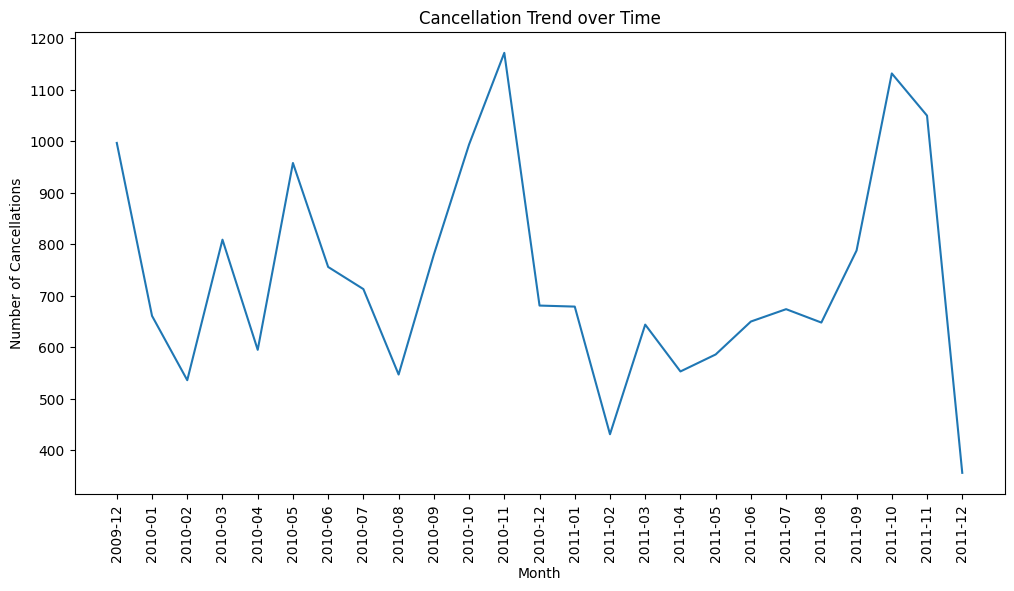

In [21]:
# Filtrer les données pour les factures d'annulation
cancelled_invoices = df[df['Invoice'].str.startswith('C')]

# Grouper les annulations par mois
cancelled_by_month = cancelled_invoices.groupby(cancelled_invoices['InvoiceDate'].dt.to_period('M')).size().reset_index(name='CancelledCount')

# Créer une colonne 'Month' contenant les mois correspondants
cancelled_by_month['Month'] = cancelled_by_month['InvoiceDate'].dt.strftime('%Y-%m')

# Trier les données par ordre chronologique
cancelled_by_month = cancelled_by_month.sort_values('InvoiceDate')

# Créer le graphique de l'évolution des annulations
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancelled_by_month, x='Month', y='CancelledCount')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellation Trend over Time')
plt.xticks(rotation=90)
plt.show()


### Quantité en fonction du temps (sur deux ans)


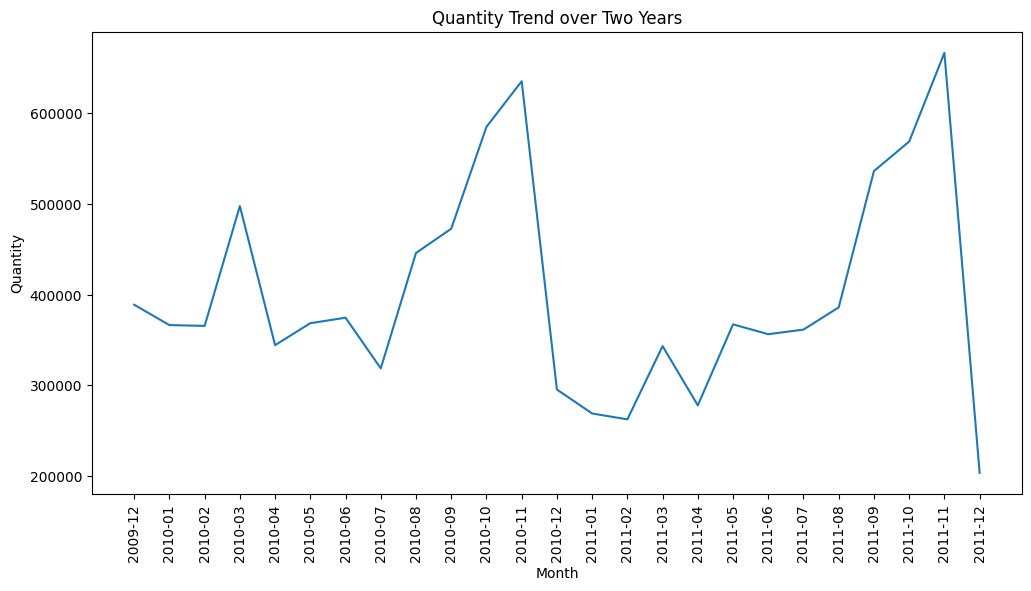

In [22]:
# Filtrer les données pour la période de deux ans
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2011-12-31')
filtered_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Grouper les données par mois et calculer la somme des quantités de produits
monthly_quantities = filtered_data.groupby(filtered_data['InvoiceDate'].dt.to_period('M')).agg({'Quantity': 'sum'}).reset_index()

# Créer une colonne 'Month' contenant les mois correspondants
monthly_quantities['Month'] = monthly_quantities['InvoiceDate'].dt.strftime('%Y-%m')

# Trier les données par ordre chronologique
monthly_quantities = monthly_quantities.sort_values('InvoiceDate')

# Créer le graphique des quantités de produits en fonction du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_quantities, x='Month', y='Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity Trend over Two Years')
plt.xticks(rotation=90)
plt.show()



### Top 15 des clients sur deux ans 


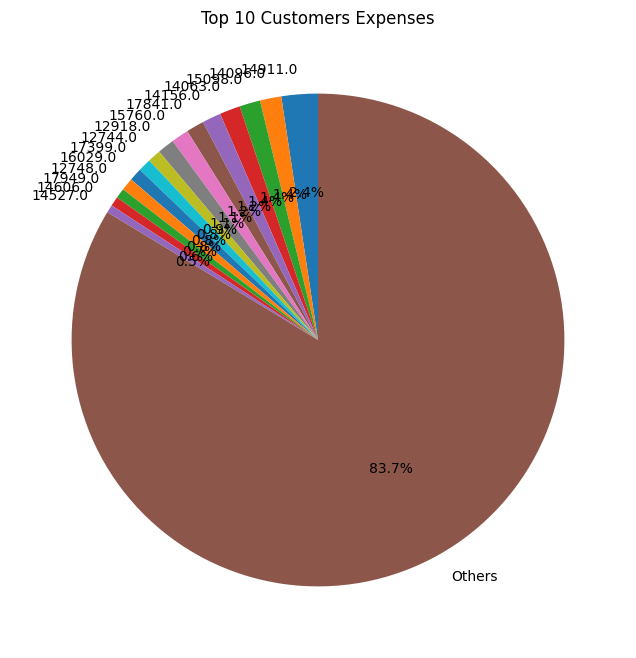

In [24]:
# Filtrer les données pour la période de deux ans
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2011-12-31')
filtered_data = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Calculer les dépenses totales par Customer ID
customer_expenses = filtered_data.groupby('Customer ID')['Price'].sum().reset_index()

# Trier les Customer ID par dépenses totales (en ordre décroissant)
top_10_customers = customer_expenses.nlargest(15, 'Price')

# Calculer la somme des dépenses des autres Customer ID
other_customers_expenses = customer_expenses[~customer_expenses['Customer ID'].isin(top_10_customers['Customer ID'])]['Price'].sum()

# Créer une liste des dépenses des top 10 Customer ID + autres
expenses_data = list(top_10_customers['Price']) + [other_customers_expenses]

# Créer une liste des labels des top 10 Customer ID + autres
labels = list(top_10_customers['Customer ID'].astype(str)) + ['Others']

# Créer le diagramme en camembert
plt.figure(figsize=(8, 8))
plt.pie(expenses_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Customers Expenses')
plt.show()


# DATASET CLUSTERS


In [42]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv("Cluster_set.csv")

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5270 non-null   float64
 1   AverageAmount  5270 non-null   float64
 2   TotalAmount    5270 non-null   float64
 3   TimeDiff       5270 non-null   float64
 4   R              5270 non-null   float64
 5   F              5270 non-null   float64
 6   M              5270 non-null   float64
 7   Cluster        5270 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 329.5 KB


- 1 Distribution des clusters : Utilisez un graphique à barres ou un graphique circulaire pour visualiser la répartition des clients dans chaque cluster. Cela vous donnera une idée de la taille relative de chaque segment.

- 2 Profil des segments : Comparez les caractéristiques des clients dans chaque segment en utilisant des graphiques boxplot ou des graphiques en barres empilées. Vous pouvez visualiser des variables telles que l'AverageAmount, TotalAmount, TimeDiff, R, F et M pour comprendre les différences entre les segments.

- 3 Analyse de la variance : Effectuez une analyse de la variance (ANOVA) pour déterminer s'il y a des différences significatives entre les segments pour une variable spécifique. Cela vous permettra d'identifier les variables qui ont un impact significatif sur la segmentation.

- 4 Analyse des tendances : Utilisez des graphiques linéaires ou des graphiques en courbes pour visualiser les tendances au fil du temps pour chaque segment. Cela peut vous aider à comprendre comment les comportements d'achat des clients évoluent dans chaque segment.

- 5 Analyse des profils : Créez des profils de segment en calculant les moyennes ou les médianes des variables pour chaque segment. Ensuite, comparez les profils pour identifier les différences clés entre les segments.

- 6 Analyse de la rétention : Analysez la rétention des clients dans chaque segment en suivant le pourcentage de clients qui sont restés dans le même segment au fil du temps. Cela peut vous donner des informations sur la fidélité des clients dans chaque segment.

- 7 Analyse des associations : Utilisez des techniques d'analyse d'association, telles que les règles d'association ou la corrélation, pour identifier les associations fréquentes entre les variables dans chaque segment. Cela peut vous aider à comprendre les combinaisons de variables qui sont caractéristiques de chaque segment.

## Clients par Cluster


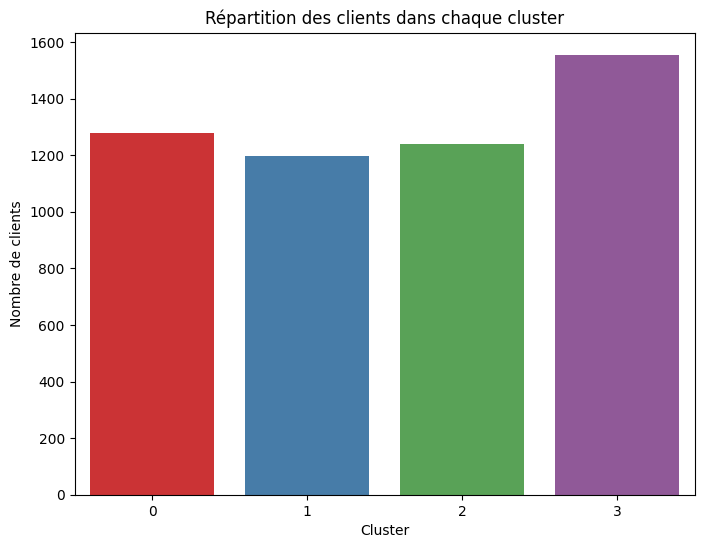

In [43]:

# Compter le nombre de clients dans chaque cluster
cluster_counts = df2['Cluster'].value_counts()

# Créer un graphique à barres pour afficher la répartition des clusters
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients dans chaque cluster')
plt.show()


# Diag en boite des colonnes par cluster


## AverageAmount


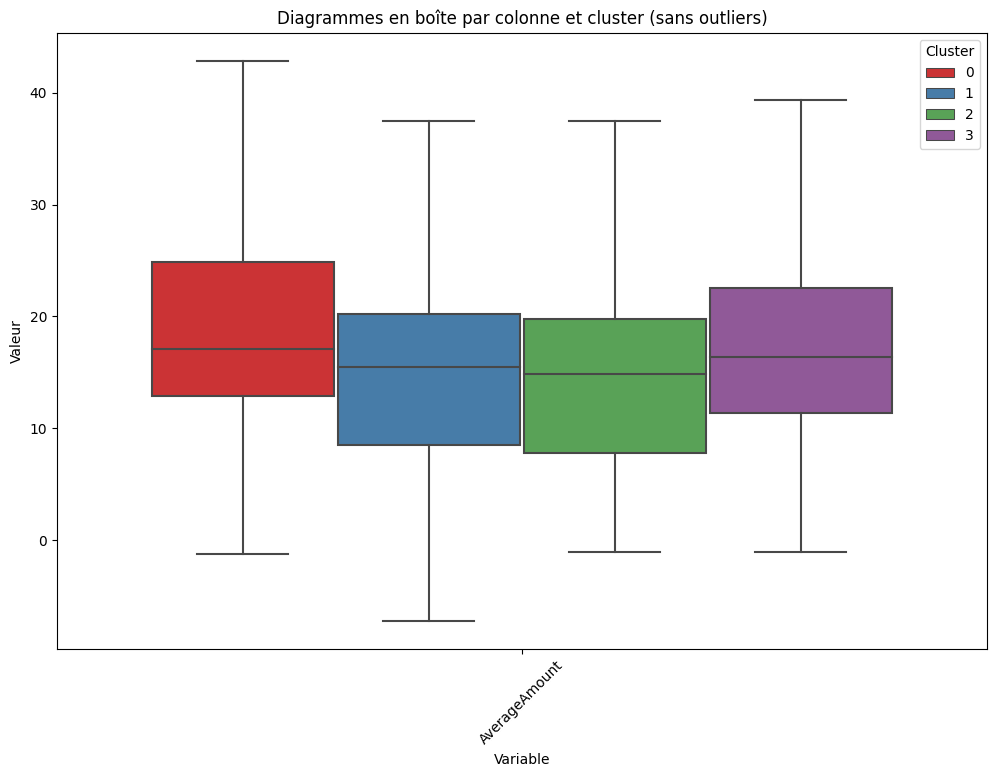

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'AverageAmount': df2['AverageAmount'],
})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## TotalAmount


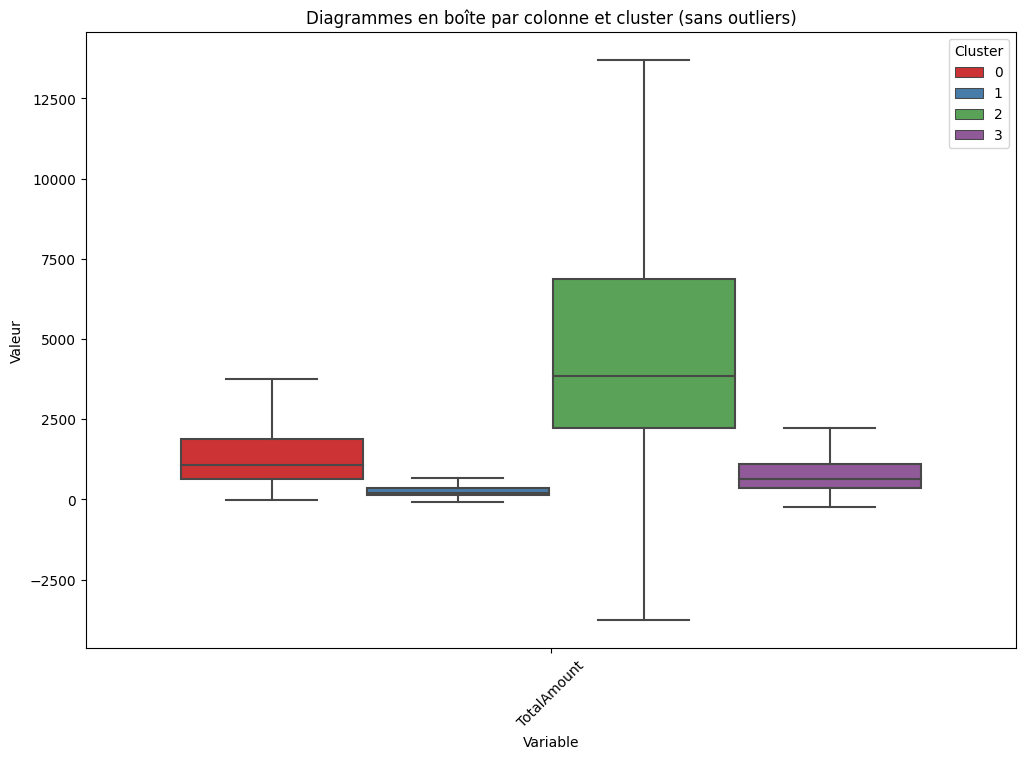

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'TotalAmount': df2['TotalAmount'],

})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## TimeDiff


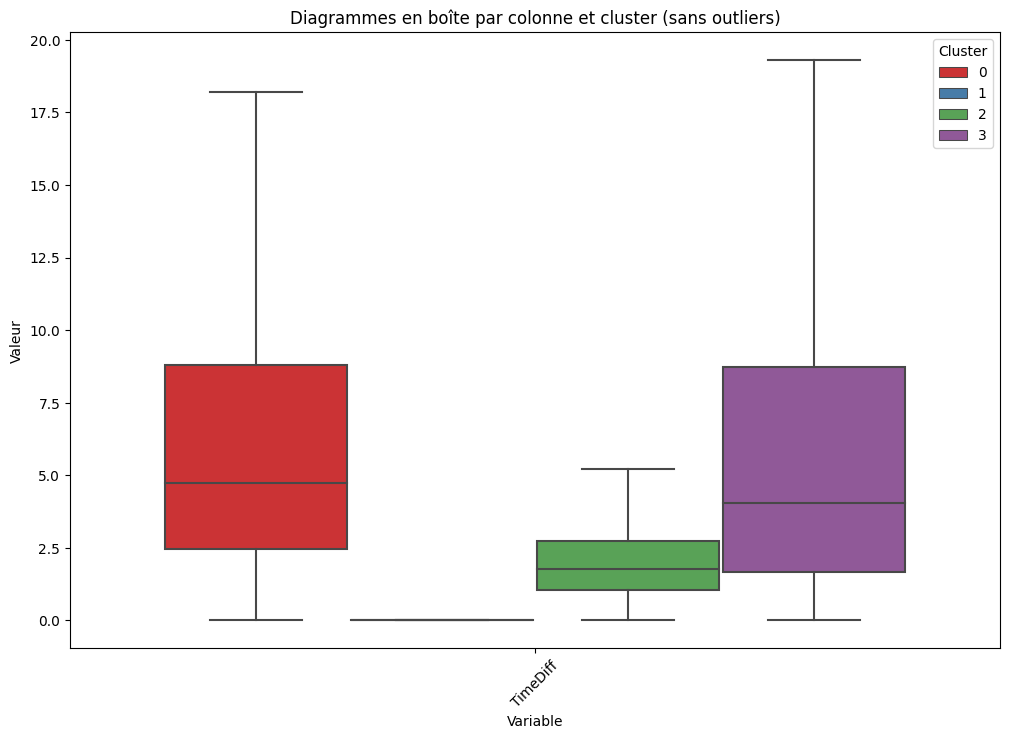

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'TimeDiff': df2['TimeDiff'],

})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## R (Recence)


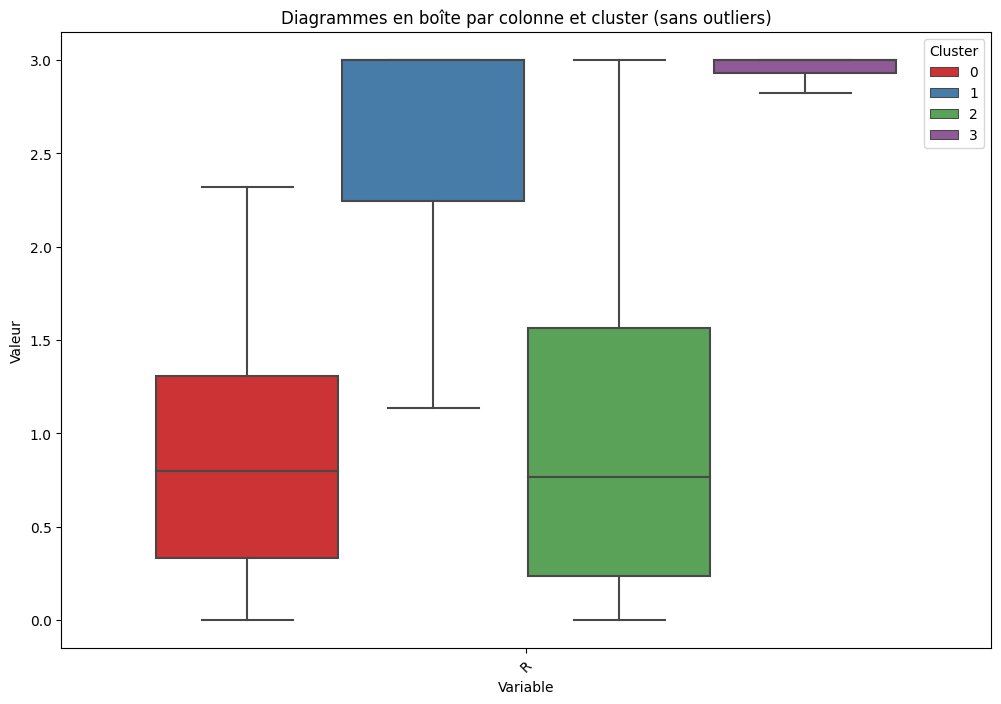

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'R': df2['R'],
})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


## F (Frequence)


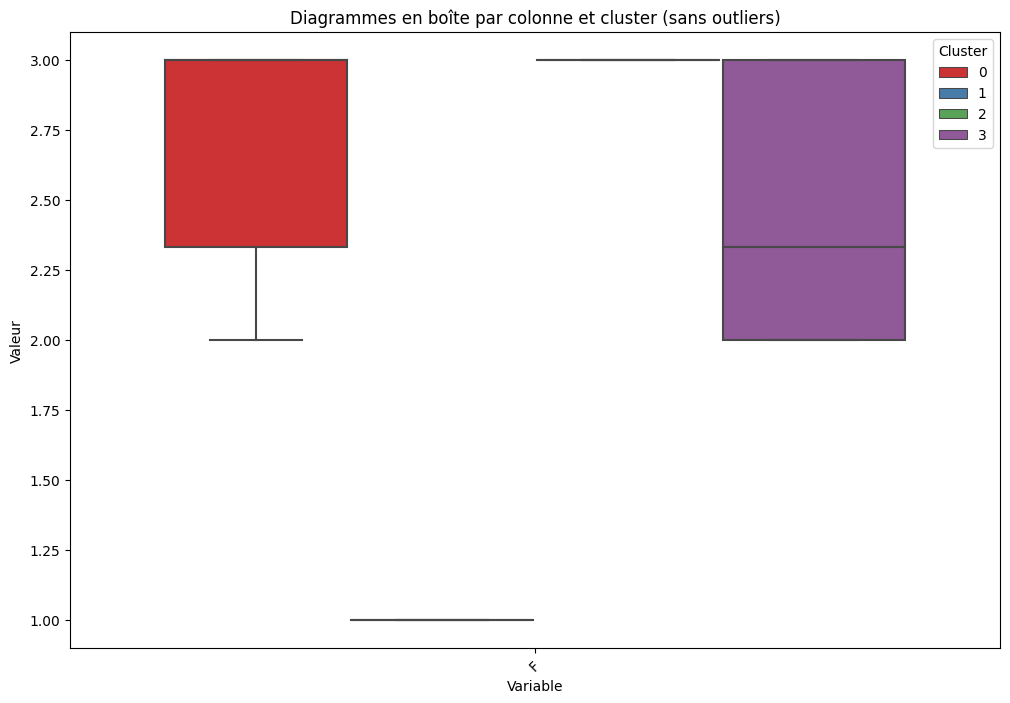

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'F': df2['F'],
})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

## M (Montant)


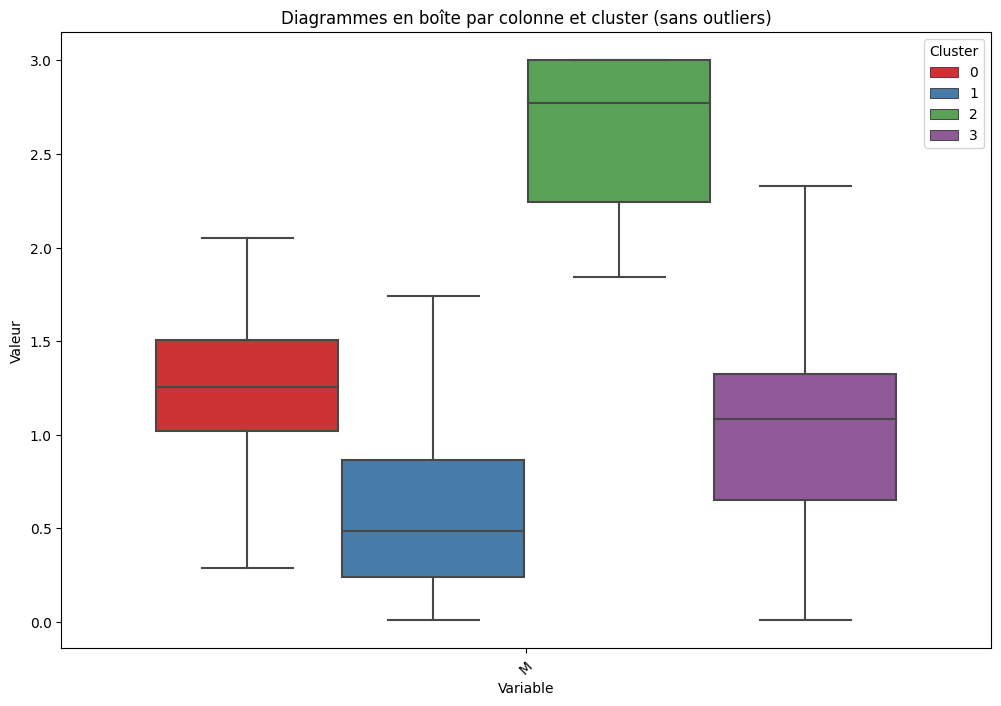

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer un DataFrame avec les colonnes 'Cluster' et chaque variable
data = pd.DataFrame({
    'Cluster': df2['Cluster'],
    'M': df2['M']
})

# Transformer le DataFrame en format long avec la fonction melt
melted_data = pd.melt(data, id_vars=['Cluster'], var_name='Variable', value_name='Value')

# Créer un diagramme en boîte pour chaque colonne par cluster sans les outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='Cluster', palette='Set1', showfliers=False)
plt.xlabel('Variable')
plt.ylabel('Valeur')
plt.title('Diagrammes en boîte par colonne et cluster (sans outliers)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

# HEATMAP


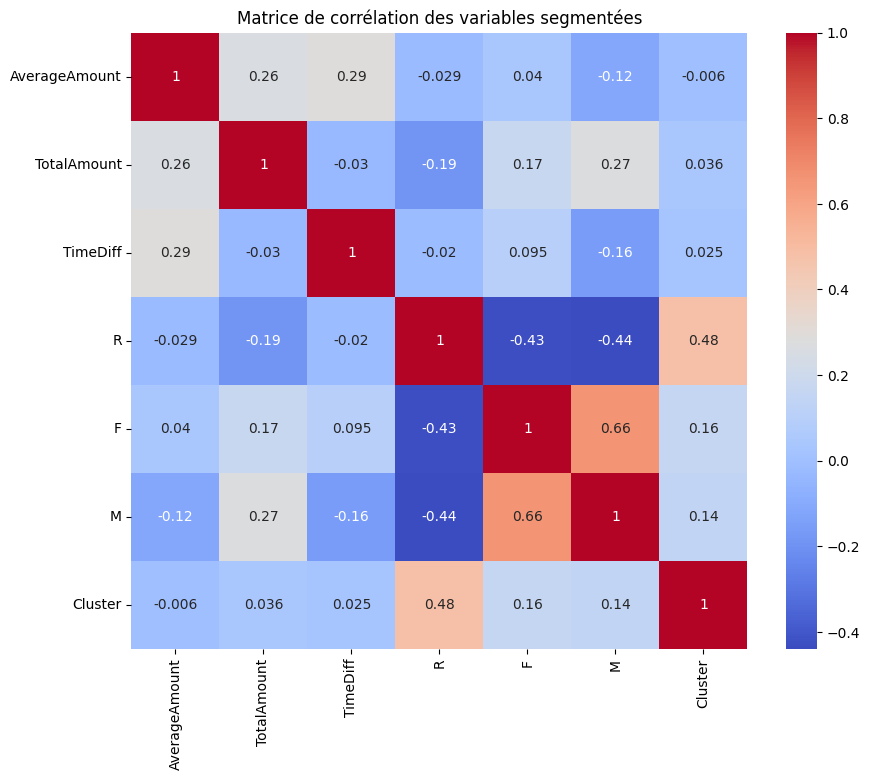

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes à inclure dans la matrice de corrélation
columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M']

# Créer une sous-dataframe avec les colonnes sélectionnées et le cluster
subset_df = df2[columns + ['Cluster']]

# Calculer la matrice de corrélation
correlation_matrix = subset_df.corr()

# Afficher la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matrice de corrélation des variables segmentées')
plt.show()


# ANOVA


### TotalAmount

In [72]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'TotalAmount'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)


Variable: TotalAmount
Valeur F : 127.60675592270162
Valeur p : 8.584355572056542e-80


### AverageAmount

In [75]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'AverageAmount'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)

Variable: AverageAmount
Valeur F : 10.516573173688238
Valeur p : 6.80562592490988e-07


### TimeDiff

In [76]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'TimeDiff'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)

Variable: TimeDiff
Valeur F : 99.26120432544644
Valeur p : 1.6893922521079234e-62


### R

In [78]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'R'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)

Variable: R
Valeur F : 2807.8991954517423
Valeur p : 0.0


### F

In [79]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'F'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)

Variable: F
Valeur F : 10814.937317179427
Valeur p : 0.0


### M

In [80]:
from scipy.stats import f_oneway

# Sélectionner la variable spécifique pour laquelle vous souhaitez effectuer l'ANOVA
variable = 'M'

# Créer des sous-groupes pour chaque segment
subgroups = []
for cluster_id in df2['Cluster'].unique():
    subgroup = df2[df2['Cluster'] == cluster_id][variable]
    subgroups.append(subgroup)

# Effectuer l'ANOVA
f_statistic, p_value = f_oneway(*subgroups)

# Afficher les résultats
print("Variable:", variable)
print("Valeur F :", f_statistic)
print("Valeur p :", p_value)

Variable: M
Valeur F : 5514.4250245504045
Valeur p : 0.0


# Clusters


### R F M

<Figure size 1000x600 with 0 Axes>

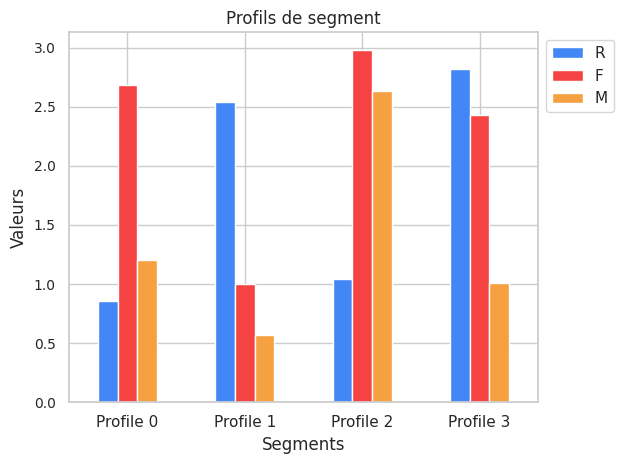

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créez des sous-ensembles de données pour chaque segment
segment0_data = df2[df2['Cluster'] == 0][['R', 'F', 'M']]
segment1_data = df2[df2['Cluster'] == 1][['R', 'F', 'M']]
segment2_data = df2[df2['Cluster'] == 2][['R', 'F', 'M']]
segment3_data = df2[df2['Cluster'] == 3][['R', 'F', 'M']]

# Calculez les moyennes des variables pour chaque segment
segment0_profile = segment0_data.mean()
segment1_profile = segment1_data.mean()
segment2_profile = segment2_data.mean()
segment3_profile = segment3_data.mean()

# Créez un DataFrame des profils de segment
segment_profiles = pd.DataFrame([segment0_profile, segment1_profile, segment2_profile, segment3_profile])
segment_profiles.index = ['Profile 0', 'Profile 1', 'Profile 2', 'Profile 3']

# Personnalisation du graphique
sns.set(style='whitegrid')  # Style de la grille
colors = ['#4287f5', '#f54242', '#f5a142', '#42f569']  # Couleurs pour chaque segment

# Tracé du graphique des profils de segment avec Seaborn
plt.figure(figsize=(10, 6))
segment_profiles.plot(kind='bar', color=colors)

# Titres et étiquettes
plt.xlabel('Segments')
plt.ylabel('Valeurs')
plt.title('Profils de segment')

# Ajustements esthétiques
plt.xticks(rotation=0)  # Rotation des étiquettes de l'axe des x
plt.yticks(fontsize=10)  # Taille des étiquettes de l'axe des y
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position de la légende

# Affichage du graphique
plt.tight_layout()  # Ajustement automatique de la disposition
plt.show()




### AverageAmount, TotalAmount, TimeDiff


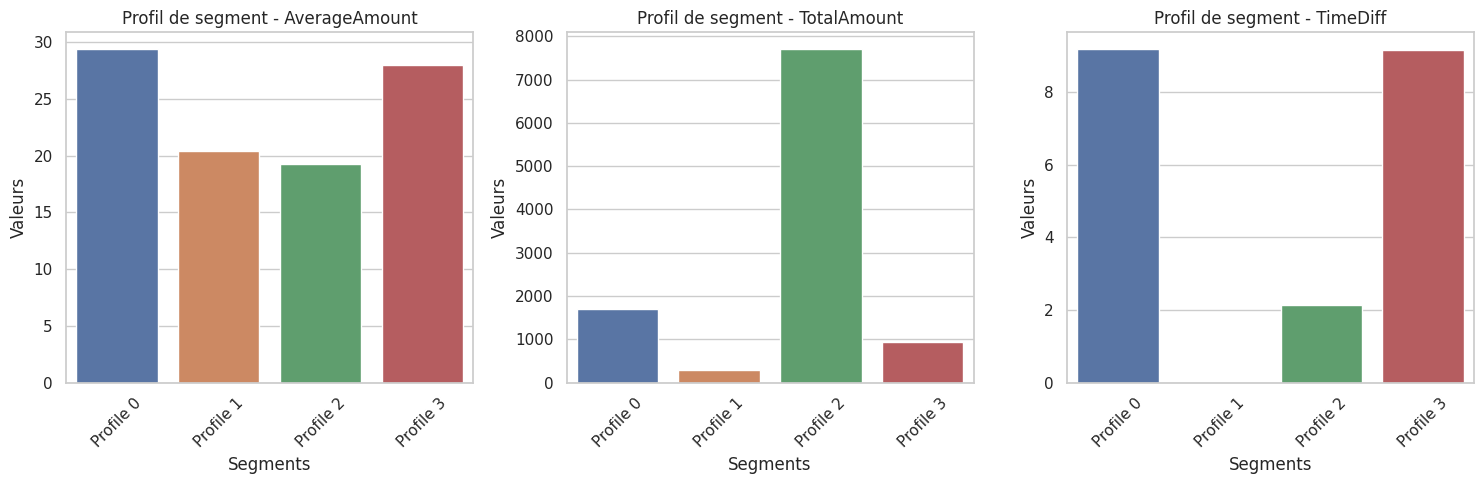

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créez des sous-ensembles de données pour chaque segment
segment0_data = df2[df2['Cluster'] == 0][['AverageAmount', 'TotalAmount', 'TimeDiff']]
segment1_data = df2[df2['Cluster'] == 1][['AverageAmount', 'TotalAmount', 'TimeDiff']]
segment2_data = df2[df2['Cluster'] == 2][['AverageAmount', 'TotalAmount', 'TimeDiff']]
segment3_data = df2[df2['Cluster'] == 3][['AverageAmount', 'TotalAmount', 'TimeDiff']]

# Calculez les moyennes des variables pour chaque segment
segment0_profile = segment0_data.mean()
segment1_profile = segment1_data.mean()
segment2_profile = segment2_data.mean()
segment3_profile = segment3_data.mean()

# Créez un DataFrame des profils de segment
segment_profiles = pd.DataFrame([segment0_profile, segment1_profile, segment2_profile, segment3_profile])
segment_profiles.index = ['Profile 0', 'Profile 1', 'Profile 2', 'Profile 3']

# Personnalisation du graphique
sns.set(style='whitegrid')  # Style de la grille
colors = ['#4287f5', '#f54242', '#f5a142', '#42f569']  # Couleurs pour chaque segment

# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Tracé des graphiques pour chaque colonne
for i, column in enumerate(segment_profiles.columns):
    sns.barplot(x=segment_profiles.index, y=column, data=segment_profiles, ax=axes[i])
    axes[i].set_xlabel('Segments')
    axes[i].set_ylabel('Valeurs')
    axes[i].set_title(f'Profil de segment - {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Ajustements esthétiques
plt.tight_layout()  # Ajustement automatique de la disposition

# Affichage du graphique
plt.show()


### Radar Plot RFM


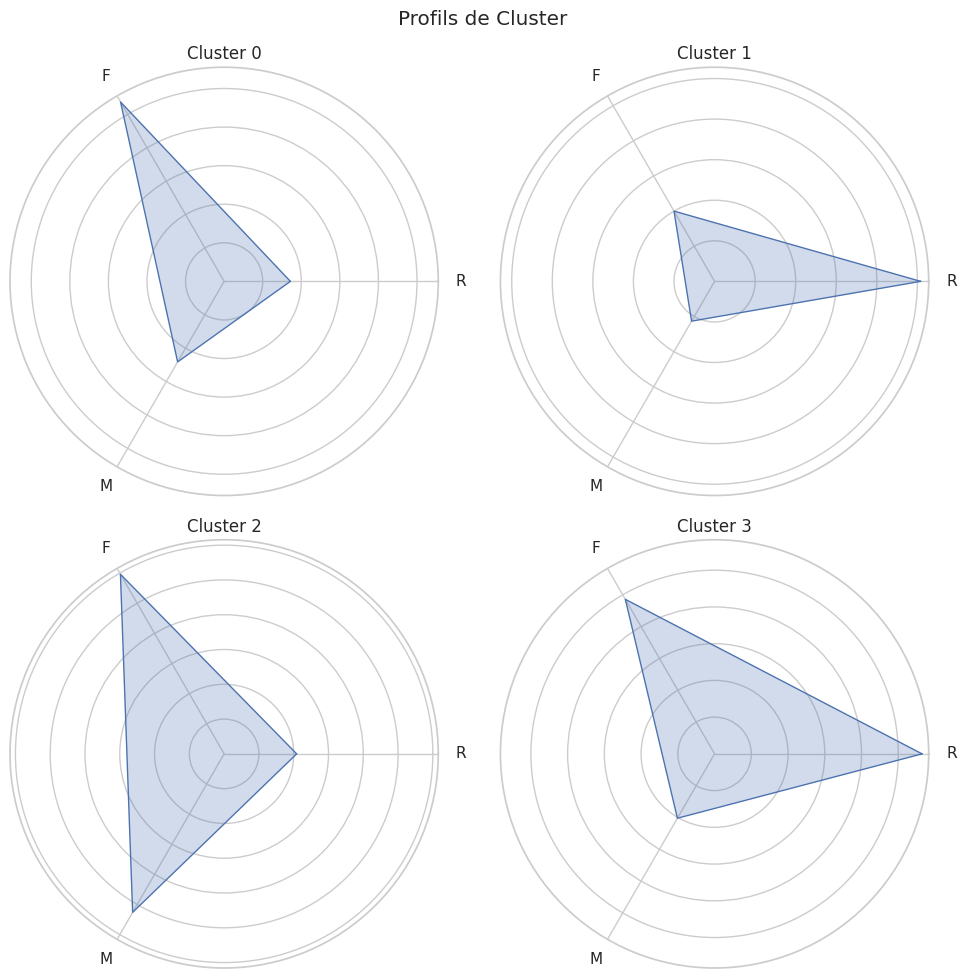

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Créez des sous-ensembles de données pour chaque cluster
cluster0_data = df2[df2['Cluster'] == 0][['R', 'F', 'M']]
cluster1_data = df2[df2['Cluster'] == 1][['R', 'F', 'M']]
cluster2_data = df2[df2['Cluster'] == 2][['R', 'F', 'M']]
cluster3_data = df2[df2['Cluster'] == 3][['R', 'F', 'M']]

# Calculez les moyennes des variables pour chaque cluster
cluster0_profile = cluster0_data.mean()
cluster1_profile = cluster1_data.mean()
cluster2_profile = cluster2_data.mean()
cluster3_profile = cluster3_data.mean()

# Créez une liste des noms de variables
variables = cluster0_profile.index.tolist()

# Créez un tableau des profils de cluster
profiles = np.array([cluster0_profile.values, cluster1_profile.values, cluster2_profile.values, cluster3_profile.values])

# Créez une liste des noms de clusters
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Créez un radar plot pour chaque cluster
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw=dict(polar=True))
fig.suptitle('Profils de Cluster')

for i, ax in enumerate(axs.flatten()):
    # Extraire le profil du cluster actuel
    profile = profiles[i]

    # Calculer les angles pour chaque variable
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la forme

    # Extraire les valeurs pour chaque variable
    values = profile.tolist()
    values += values[:1]  # Fermer la forme

    # Tracer le radar plot
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Paramètres esthétiques
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_yticklabels([])
    ax.set_title(cluster_names[i])

# Ajustements esthétiques
plt.tight_layout()
plt.show()


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5270 non-null   float64
 1   AverageAmount  5270 non-null   float64
 2   TotalAmount    5270 non-null   float64
 3   TimeDiff       5270 non-null   float64
 4   R              5270 non-null   float64
 5   F              5270 non-null   float64
 6   M              5270 non-null   float64
 7   Cluster        5270 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 329.5 KB


### Radar Plot All Vars

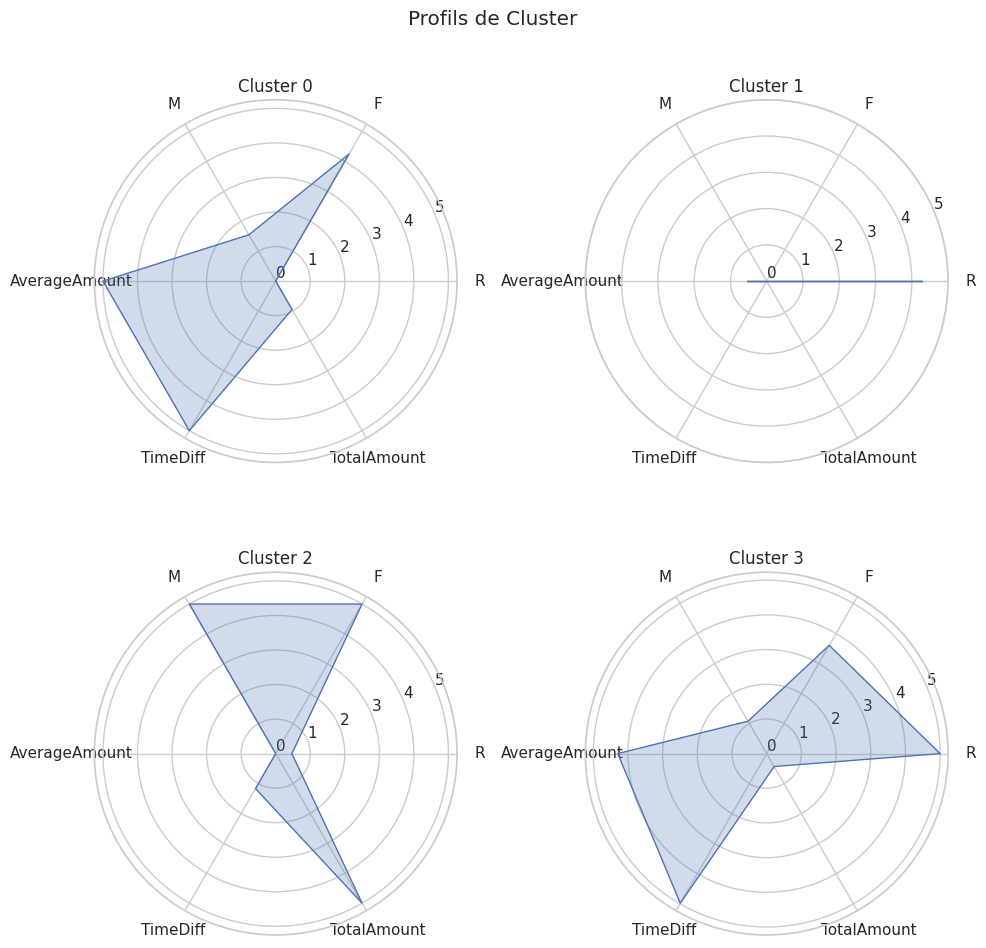

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Créez des sous-ensembles de données pour chaque cluster
cluster0_data = df2[df2['Cluster'] == 0][['R', 'F', 'M','AverageAmount','TimeDiff','TotalAmount']]
cluster1_data = df2[df2['Cluster'] == 1][['R', 'F', 'M','AverageAmount','TimeDiff','TotalAmount']]
cluster2_data = df2[df2['Cluster'] == 2][['R', 'F', 'M','AverageAmount','TimeDiff','TotalAmount']]
cluster3_data = df2[df2['Cluster'] == 3][['R', 'F', 'M','AverageAmount','TimeDiff','TotalAmount']]

# Calculez les moyennes des variables pour chaque cluster
cluster0_profile = cluster0_data.mean()
cluster1_profile = cluster1_data.mean()
cluster2_profile = cluster2_data.mean()
cluster3_profile = cluster3_data.mean()

# Créez une liste des noms de variables
variables = cluster0_profile.index.tolist()

# Créez un tableau des profils de cluster
profiles = np.array([cluster0_profile.values, cluster1_profile.values, cluster2_profile.values, cluster3_profile.values])

# Appliquer MinMaxScaler pour mettre à l'échelle les valeurs des variables entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))
profiles_scaled = scaler.fit_transform(profiles)

# Appliquer une transformation linéaire personnalisée pour ajuster les valeurs à l'échelle de 0 à 5
transformed_profiles = profiles_scaled * 5

# Créez une liste des noms de clusters
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Créez un radar plot pour chaque cluster
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw=dict(polar=True))
fig.suptitle('Profils de Cluster')

for i, ax in enumerate(axs.flatten()):
    # Extraire le profil du cluster actuel
    profile = transformed_profiles[i]

    # Calculer les angles pour chaque variable
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la forme

    # Extraire les valeurs pour chaque variable
    values = profile.tolist()
    values += values[:1]  # Fermer la forme

    # Tracer le radar plot en utilisant une échelle logarithmique
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Paramètres esthétiques
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_yticks([0, 1, 2, 3, 4, 5])  # Échelle de 0 à 5
    ax.set_title(cluster_names[i])

# Ajustements esthétiques
plt.tight_layout()
plt.show()



### Radar Plot AverageAmount, TotalAmount, TimeDiff


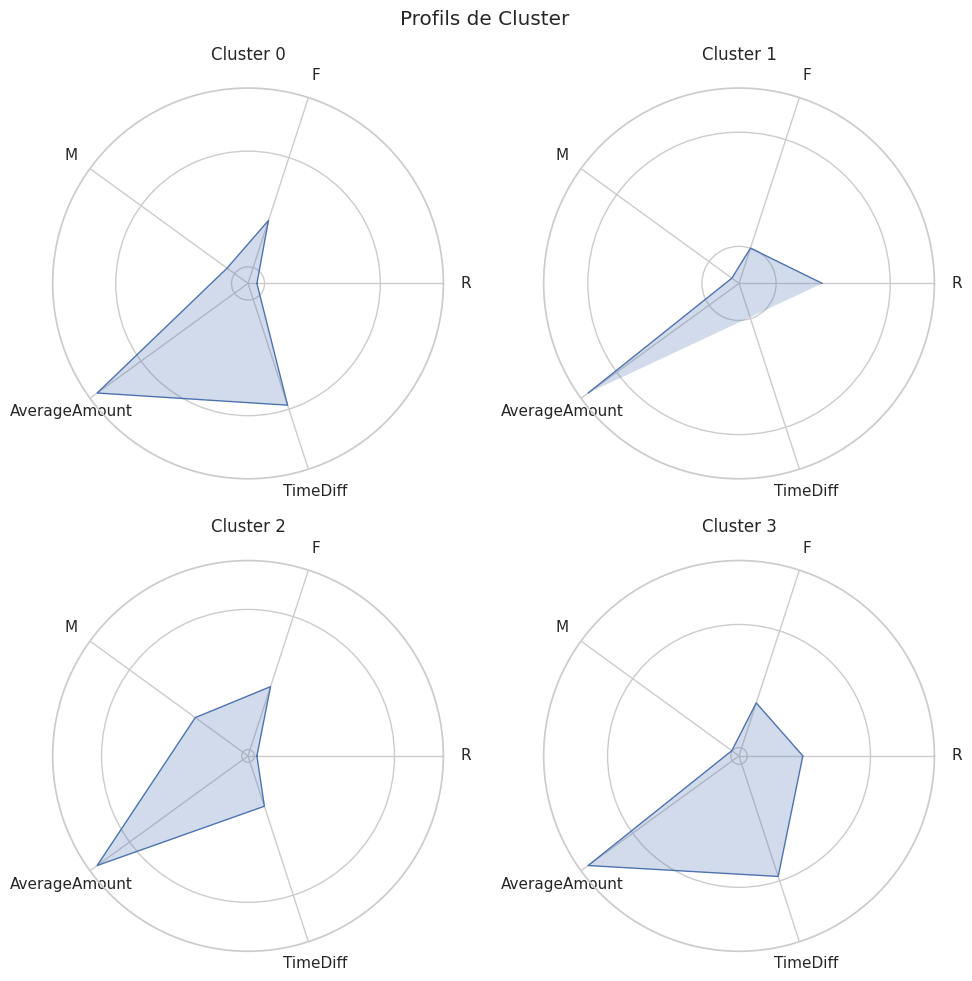

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Créez des sous-ensembles de données pour chaque cluster
cluster0_data = df2[df2['Cluster'] == 0][['R', 'F', 'M','AverageAmount','TimeDiff']]
cluster1_data = df2[df2['Cluster'] == 1][['R', 'F', 'M','AverageAmount','TimeDiff']]
cluster2_data = df2[df2['Cluster'] == 2][['R', 'F', 'M','AverageAmount','TimeDiff']]
cluster3_data = df2[df2['Cluster'] == 3][['R', 'F', 'M','AverageAmount','TimeDiff']]

# Calculez les moyennes des variables pour chaque cluster
cluster0_profile = cluster0_data.mean()
cluster1_profile = cluster1_data.mean()
cluster2_profile = cluster2_data.mean()
cluster3_profile = cluster3_data.mean()

# Créez une liste des noms de variables
variables = cluster0_profile.index.tolist()

# Créez un tableau des profils de cluster
profiles = np.array([cluster0_profile.values, cluster1_profile.values, cluster2_profile.values, cluster3_profile.values])

# Créez une liste des noms de clusters
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']

# Créez un radar plot pour chaque cluster
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw=dict(polar=True))
fig.suptitle('Profils de Cluster')

for i, ax in enumerate(axs.flatten()):
    # Extraire le profil du cluster actuel
    profile = profiles[i]

    # Calculer les angles pour chaque variable
    angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Fermer la forme

    # Extraire les valeurs pour chaque variable
    values = profile.tolist()
    values += values[:1]  # Fermer la forme

    # Tracer le radar plot en utilisant une échelle logarithmique
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Paramètres esthétiques
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_yscale('log')  # Échelle logarithmique pour les valeurs
    ax.set_yticklabels([])  # Masquer les étiquettes de l'axe des y
    ax.set_title(cluster_names[i])

# Ajustements esthétiques
plt.tight_layout()
plt.show()


### Separation


### Separation


### Separation


### Separation


### Separation


### Separation
